In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.data.gz'
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup99-mld/kddcup.data_10_percent.gz'
file_name1 = 'kddcup.data.gz'
file_name2 = 'kddcup.data_10_percent.gz'
data_path = tf.keras.utils.get_file(file_name2, origin=url2, extract=True)

In [3]:
column_name = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
                'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
                'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
                'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
                'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
                'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type']

In [4]:
df = pd.read_csv(data_path, header=None,names=column_name)


df.columns = column_name

In [5]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')

In [6]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [7]:
df.shape

(494021, 42)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [9]:
print(df.describe())

            duration     src_bytes     dst_bytes           land  \
count  494021.000000  4.940210e+05  4.940210e+05  494021.000000   
mean       47.979302  3.025610e+03  8.685324e+02       0.000045   
std       707.746472  9.882181e+05  3.304000e+04       0.006673   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494021.000000  494021.000000  494021.000000      494021.000000   
mean         0.006433       0.000014       0.034519           0.000152   
std          0.134805       0.005510       0.782103           0.015520   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

In [10]:
df.attack_type.unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

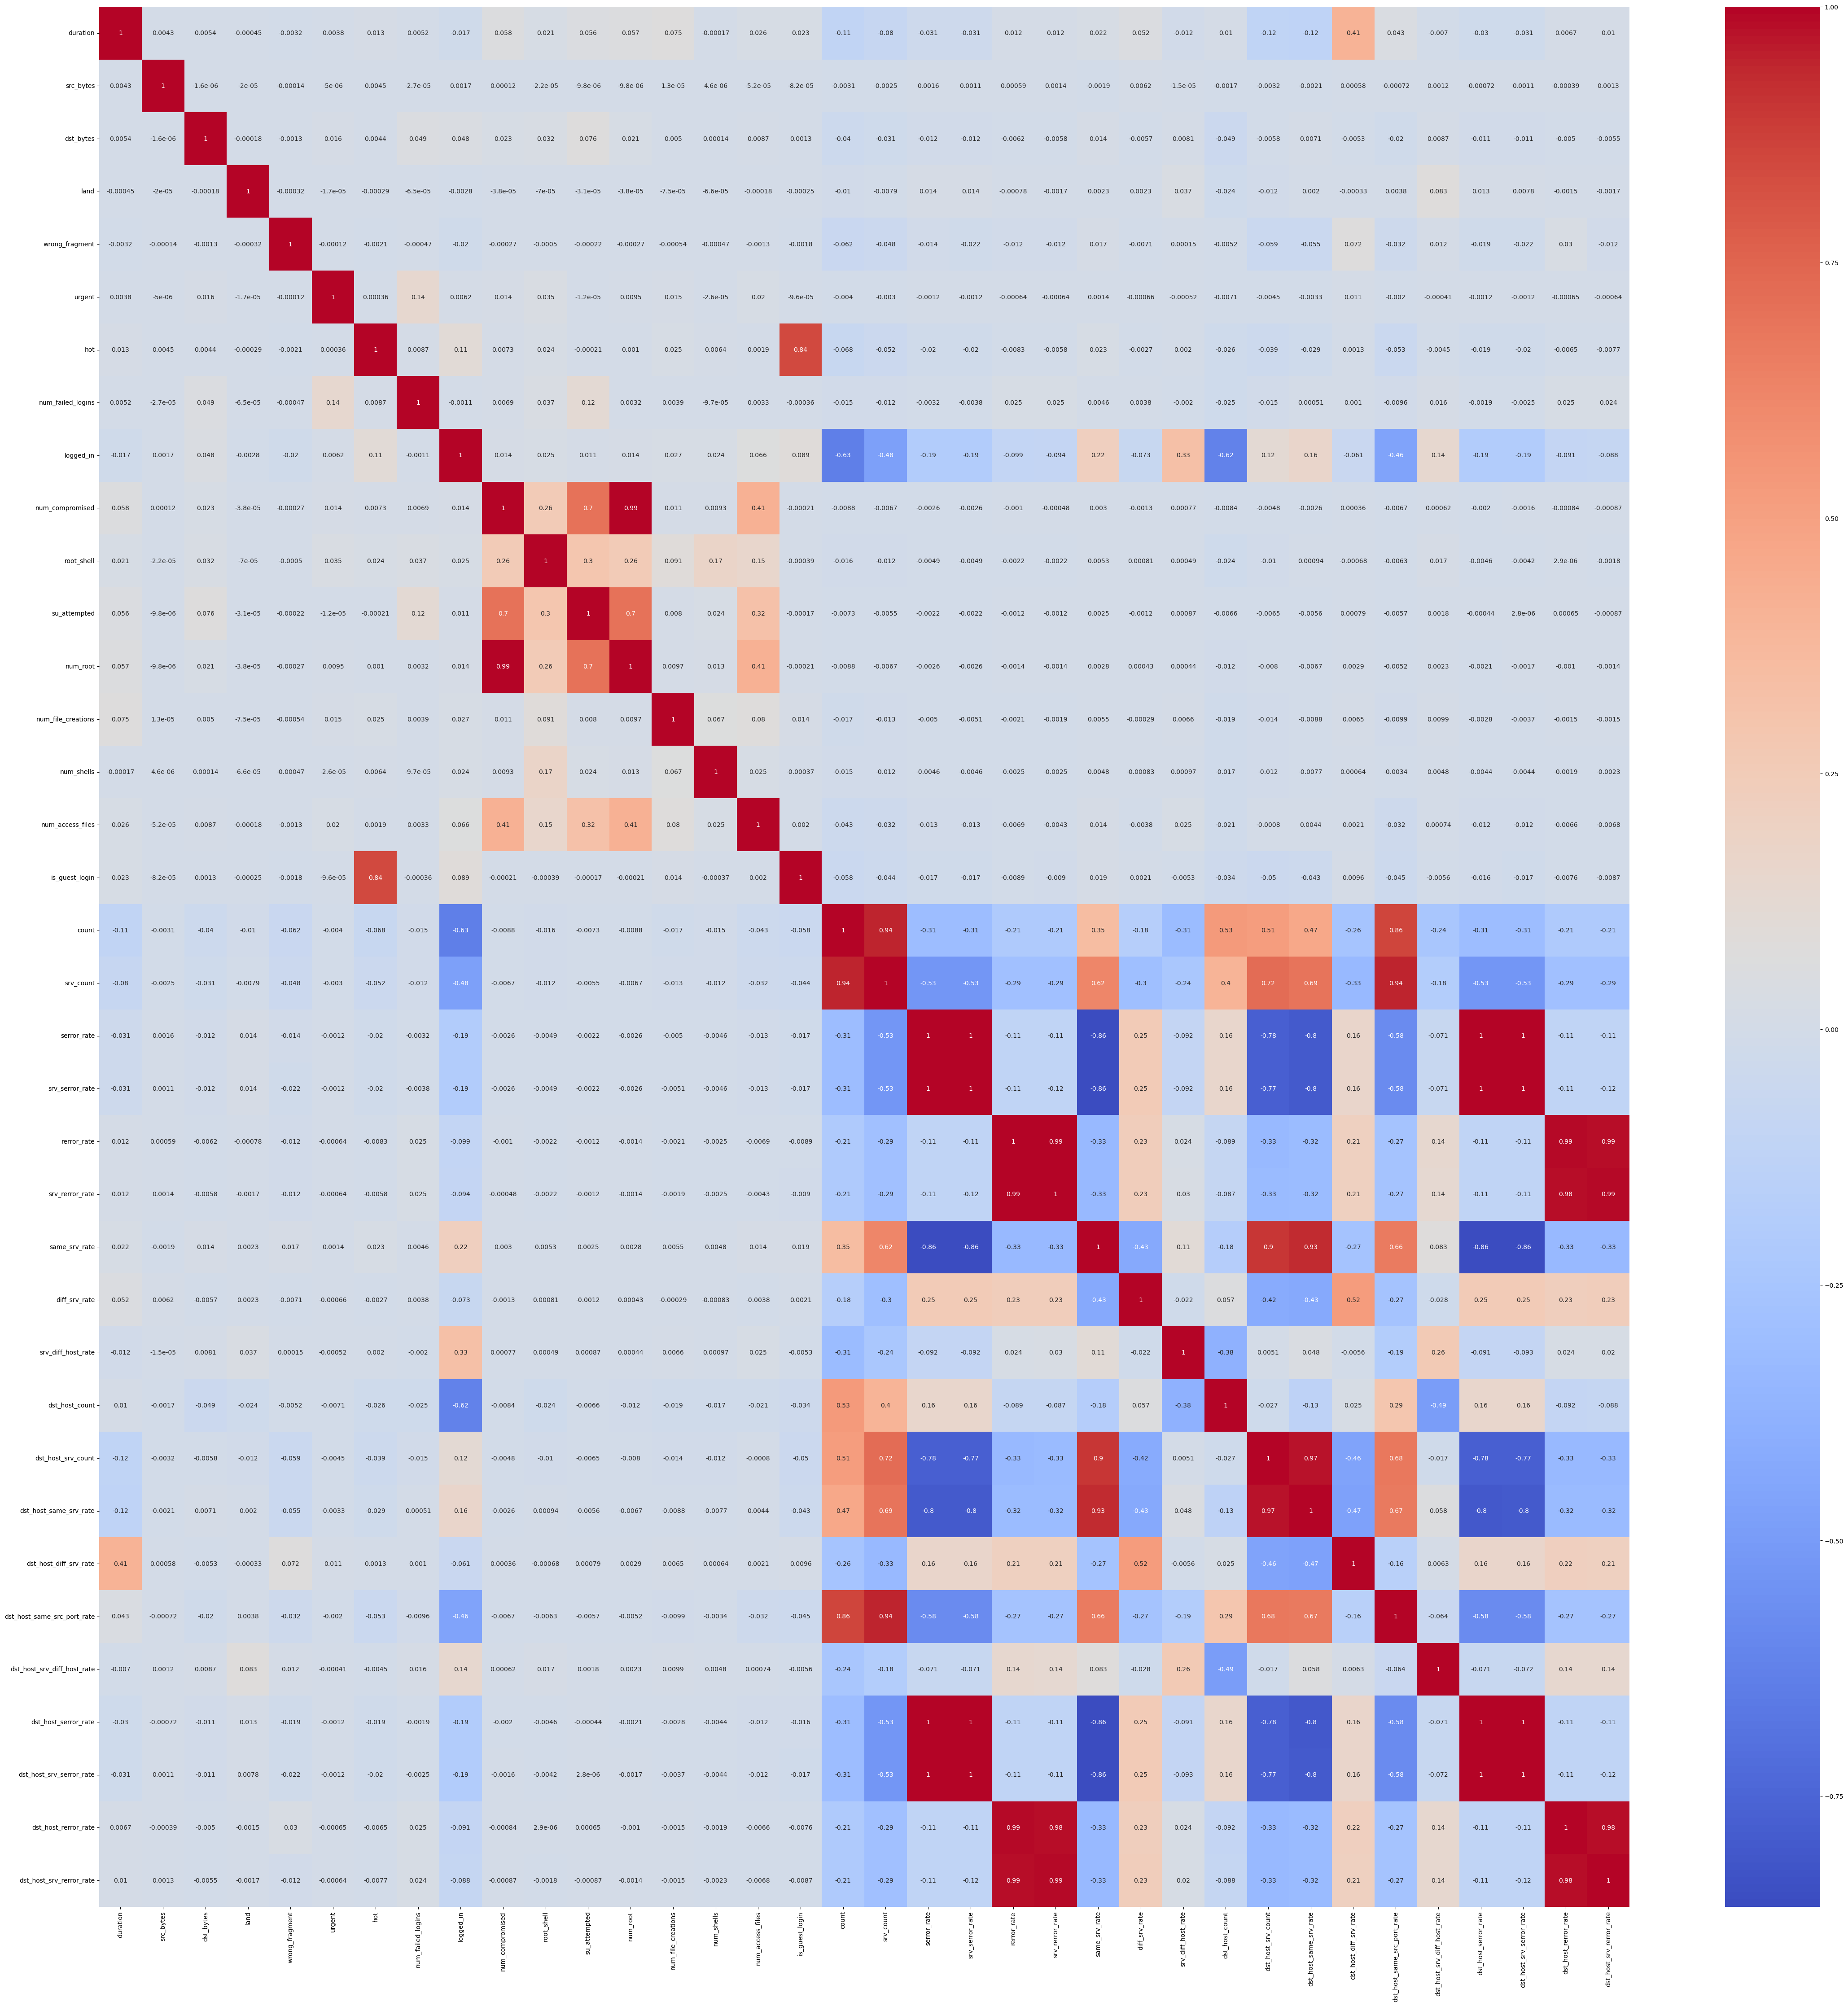

In [12]:
df_corr = df.drop(['num_outbound_cmds', 'is_host_login'], axis=1)
plt.figure(figsize=(55,55))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=True)
plt.show()

number of classes: 23



smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: attack_type, dtype: int64

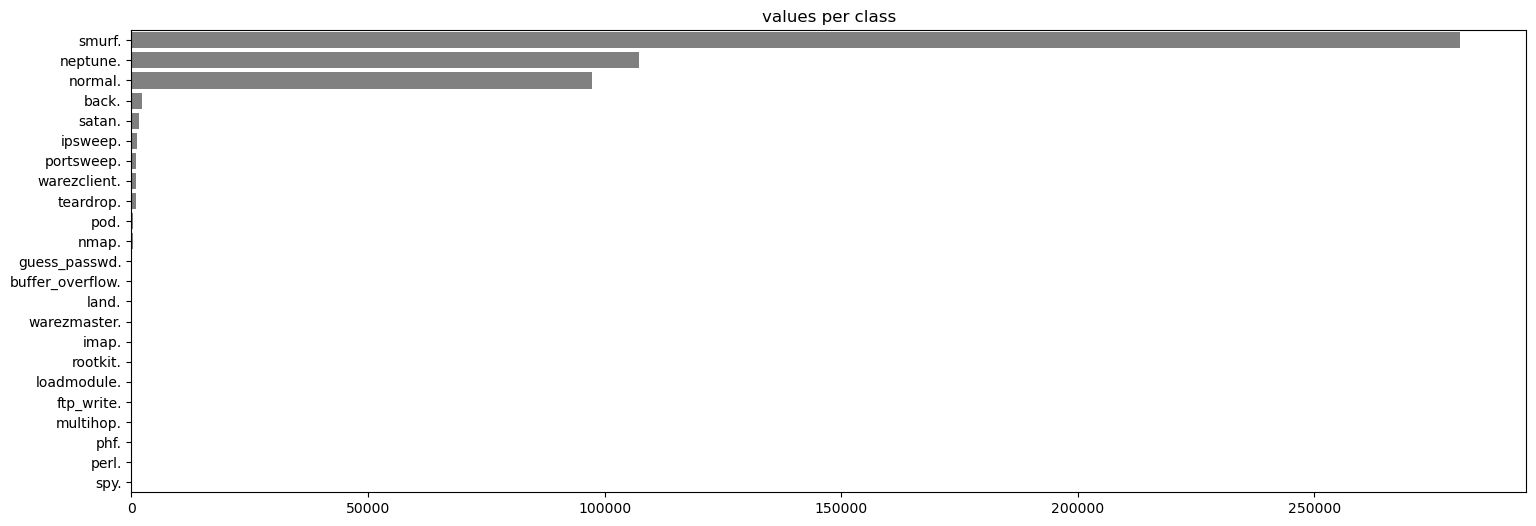

In [13]:
print('number of classes:', df['attack_type'].nunique())
print('')
label_counts = df['attack_type'].value_counts()
plt.figure(figsize=(18,6));
sns.barplot(y=label_counts.index, x=label_counts.values, color='Grey');
plt.title('values per class');
display(label_counts)


In [14]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

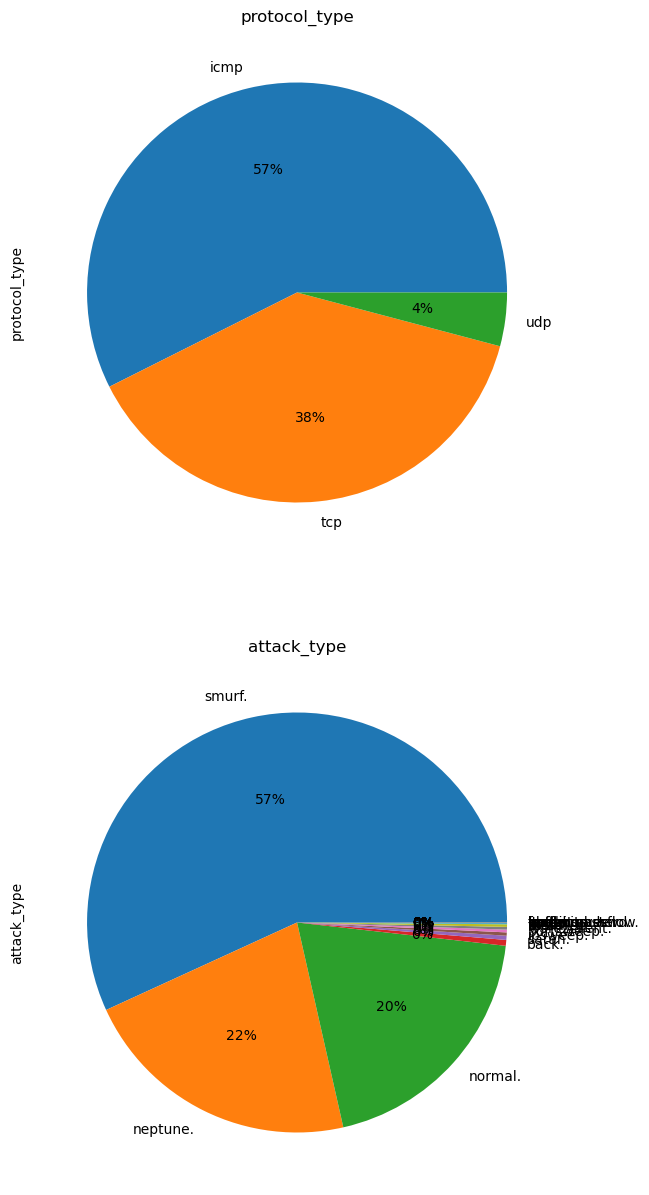

In [15]:
pie_plot(df, ['protocol_type', 'attack_type'], 2, 1)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
categorical_columns = ['protocol_type', 'service', 'flag', 'attack_type']

In [18]:
encoders = {}
for column in categorical_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

In [19]:
encoders

{'protocol_type': LabelEncoder(),
 'service': LabelEncoder(),
 'flag': LabelEncoder(),
 'attack_type': LabelEncoder()}

In [20]:
df.attack_type.unique()

array([11,  1,  7, 12,  9, 18,  3, 14, 20, 15,  5,  6,  2,  0,  4, 17, 13,
       10,  8, 22, 21, 19, 16])

In [21]:
df.attack_type.value_counts()

18    280790
9     107201
11     97278
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: attack_type, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks
import numpy as np

In [23]:
X = df.drop('attack_type', axis=1)
y = df['attack_type']

In [24]:
X.shape


(494021, 41)

In [25]:
y.shape

(494021,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y)
X = np.array(X)
y = np.array(y)

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)






In [29]:
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential 
from keras.layers import Input
from keras.models import Model

from keras.utils import to_categorical

from keras.utils.vis_utils import plot_model
model = Sequential()

model.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))  
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))  
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation and 23 units
model.add(Dense(units=23, activation='softmax'))

y_train_onehot = to_categorical(y_train, num_classes=23)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 41, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 2, 32)             0

In [31]:
from keras.optimizers import Adam


optimizer = Adam(lr=0.001)
loss = 'categorical_crossentropy'

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\vichu\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=5000, validation_split=0.2)


Epoch 1/10
64/64 [==============================] - 7s 89ms/step - loss: 571.3087 - accuracy: 0.5894 - val_loss: 32.5714 - val_accuracy: 0.8944
Epoch 2/10
64/64 [==============================] - 6s 92ms/step - loss: 185.8041 - accuracy: 0.8192 - val_loss: 203.4549 - val_accuracy: 0.9206
Epoch 3/10
64/64 [==============================] - 6s 91ms/step - loss: 77.3911 - accuracy: 0.8688 - val_loss: 37.5794 - val_accuracy: 0.9300
Epoch 4/10
64/64 [==============================] - 5s 85ms/step - loss: 347.9767 - accuracy: 0.8853 - val_loss: 46.5974 - val_accuracy: 0.9652
Epoch 5/10
64/64 [==============================] - 5s 84ms/step - loss: 134.4339 - accuracy: 0.8935 - val_loss: 51.9897 - val_accuracy: 0.9651
Epoch 6/10
64/64 [==============================] - 5s 85ms/step - loss: 63.6361 - accuracy: 0.9131 - val_loss: 30.6374 - val_accuracy: 0.9620
Epoch 7/10
64/64 [==============================] - 6s 87ms/step - loss: 294.5980 - accuracy: 0.8844 - val_loss: 54.4435 - val_accuracy: 

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)

3088/3088 [==============================] - 5s 2ms/step


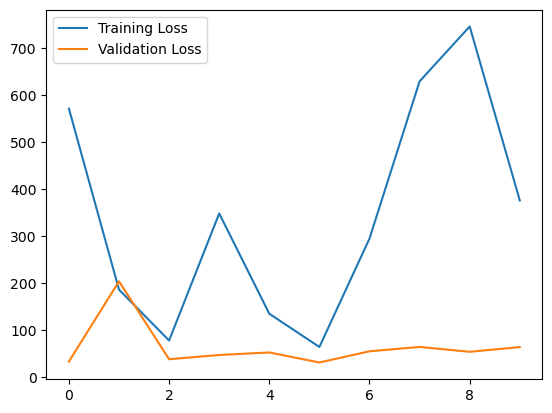

Loss reduction percentage: 83.12%


In [34]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Calculate the percentage of loss reduction
last_epoch_train_loss = train_loss[-1]
last_epoch_val_loss = val_loss[-1]
loss_reduction_percentage = ((last_epoch_train_loss - last_epoch_val_loss) / last_epoch_train_loss) * 100

# Plot the training and validation loss over the epochs
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

print('Loss reduction percentage: {:.2f}%'.format(loss_reduction_percentage))


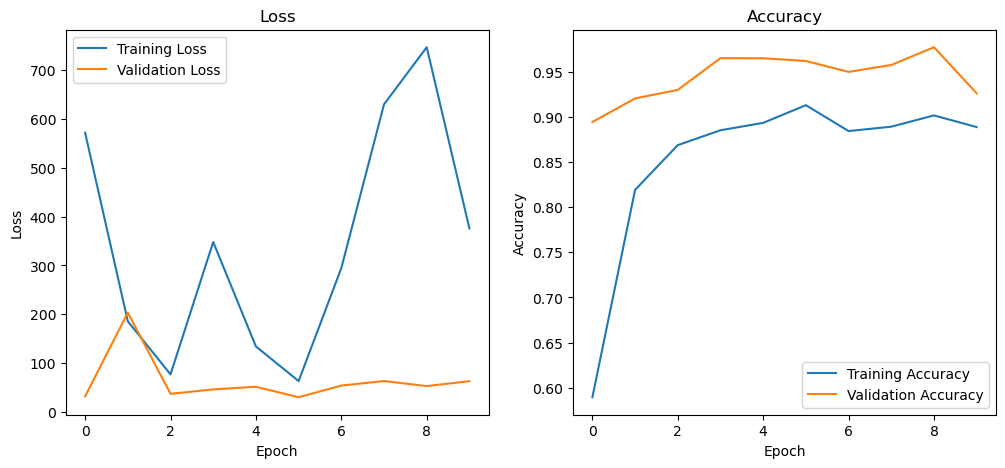

In [35]:
# Get loss and accuracy values for each epoch from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']  # change 'accuracy' to 'acc'
val_acc = history.history['val_accuracy']  # change 'val_accuracy' to 'val_acc'

# Create figure and axes objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot loss values for training and validation datasets
ax1.plot(train_loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
 
# Plot accuracy values for training and validation datasets
ax2.plot(train_acc, label='Training Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plot
plt.show()

In [36]:
import pickle

# Save the model to a file
with open('intrusion_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling1d
......vars
...layers\max_pooling1d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-18 18:56:30         3327
metadata.json                               

In [37]:
with open('intrusion_detection_model.pkl', 'rb') as f:
    model = pickle.load(f)


duration = 1
protocol_type_enc = 0
service_enc = 0
flag_enc = 0
src_bytes = 5
dst_bytes = 0
land = 0
wrong_fragment = 0
urgent = 4
hot = 0
num_failed_logins = 0
logged_in = 23
num_compromised = 0
root_shell = 1
su_attempted = 0
num_root = 0
num_file_creations = 0
num_shells = 0
num_access_files = 0
num_outbound_cmds = 0
is_host_login = 0
is_guest_login = 0
count = 0
srv_count = 0
serror_rate = 0.0
srv_serror_rate = 0.0
rerror_rate = 0.0
srv_rerror_rate = 0.0
same_srv_rate = 0.0
diff_srv_rate = 0.0
srv_diff_host_rate = 0.0
dst_host_count = 0
dst_host_srv_count = 0
dst_host_same_srv_rate = 0.0
dst_host_diff_srv_rate = 0.0
dst_host_same_src_port_rate = 0.0
dst_host_srv_diff_host_rate = 0.0
dst_host_serror_rate = 1.0
dst_host_srv_serror_rate = 0.0
dst_host_rerror_rate = 3.0
dst_host_srv_rerror_rate = 0.0


custom_input1 = np.array([[duration, protocol_type_enc, service_enc, flag_enc, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate]])


prediction = model.predict(custom_input1)

if prediction[0][0] == 0:
    print('The predicted attack type is NORMAL.')

else:
    print('An malicious attack type,it can be known or unknown')


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-18 18:56:30         3327
metadata.json                                  2023-04-18 18:56:30           64
variables.h5                                   2023-04-18 18:56:30       126520
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv1d
......vars
.........0
.........1
...layers\conv1d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling1d
......vars
...layers\max_pooling1d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
...

In [38]:
duration = 60
protocol_type_enc = 1
service_enc = 5
flag_enc = 2
src_bytes = 1000
dst_bytes = 500
land = 0
wrong_fragment = 0
urgent = 0
hot = 5
num_failed_logins = 0
logged_in = 1
num_compromised = 0
root_shell = 0
su_attempted = 0
num_root = 0
num_file_creations = 0
num_shells = 0
num_access_files = 0
num_outbound_cmds = 0
is_host_login = 0
is_guest_login = 0
count = 50
srv_count = 20
serror_rate = 0.1
srv_serror_rate = 0.2
rerror_rate = 0.05
srv_rerror_rate = 0.1
same_srv_rate = 0.8
diff_srv_rate = 0.2
srv_diff_host_rate = 0.1
dst_host_count = 150
dst_host_srv_count = 50
dst_host_same_srv_rate = 0.5
dst_host_diff_srv_rate = 0.2
dst_host_same_src_port_rate = 0.1
dst_host_srv_diff_host_rate = 0.01
dst_host_serror_rate = 0.05
dst_host_srv_serror_rate = 0.1
dst_host_rerror_rate = 0.1
dst_host_srv_rerror_rate = 0.05

custom_input2 = np.array([[duration, protocol_type_enc, service_enc, flag_enc, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate]])


prediction = model.predict(custom_input2)

if prediction[0][0] == 0:
    print('The predicted attack type is NORMAL.')

else:
    print('An malicious attack type,it can be known or unknown')


1/1 [==============================] - 0s 23ms/step
The predicted attack type is NORMAL.
